<a href="https://colab.research.google.com/github/briannguyen19/CS418-presentation/blob/main/Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tuan Khang Nguyen (Data Diver): Model Traning using cleaned data.

List of the model:


1.   K-Nearest Neighbor
          * K-Nearest Neighbor (Chicago)
          * K-Nearest Neighbor (LA)

2.   K-Means Clustering

          * K-Means Clustering (Chicago)
          * K-Means Clustering (LA)

3.   Mean-shift Clustering
          * Mean-shift Clustering (Chicago)
          * Mean-shift Clustering (LA)




In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import io, time, json
import requests
from bs4 import BeautifulSoup

In [ ]:
import pandas as pd

url = "https://data.lacity.org/api/views/63jg-8b9z/rows.csv?accessType=DOWNLOAD"
los_crime_df = pd.read_csv(url)

# Show the first few rows of the DataFrame
print(los_crime_df.head())


       DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA   \
0    1307355  02/20/2010 12:00:00 AM  02/20/2010 12:00:00 AM      1350     13   
1   11401303  09/13/2010 12:00:00 AM  09/12/2010 12:00:00 AM        45     14   
2   70309629  08/09/2010 12:00:00 AM  08/09/2010 12:00:00 AM      1515     13   
3   90631215  01/05/2010 12:00:00 AM  01/05/2010 12:00:00 AM       150      6   
4  100100501  01/03/2010 12:00:00 AM  01/02/2010 12:00:00 AM      2100      1   

   AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0     Newton         1385         2     900   
1    Pacific         1485         2     740   
2     Newton         1324         2     946   
3  Hollywood          646         2     900   
4    Central          176         1     122   

                                         Crm Cd Desc  ... Status  \
0                           VIOLATION OF COURT ORDER  ...     AA   
1  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     IC   
2                         

In [ ]:
# check the data
chicago_crime_df = pd.read_csv('ChicagoCrimes.csv')
print(chicago_crime_df.columns)


Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')


In [ ]:
# we see that the column names 'Crm Cd Desc' and 'Premis Desc'
# is confusing so we rename them to their equivalent
los_crime_df = los_crime_df.rename(columns={
    'Crm Cd Desc': 'Primary Type',
    'Premis Desc': 'Location Description'
})
los_crime_df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Primary Type,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119792,190506304,02/22/2019 12:00:00 AM,02/22/2019 12:00:00 AM,840,5,Harbor,569,2,627,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,...,AO,Adult Other,627.0,NaN,NaN,NaN,100 W 22ND ST,NaN,33.7257,-118.2801
2119793,190608903,03/28/2019 12:00:00 AM,03/28/2019 12:00:00 AM,400,6,Hollywood,644,1,648,ARSON,...,IC,Invest Cont,648.0,NaN,NaN,NaN,1400 N LA BREA AV,NaN,34.0962,-118.3490
2119794,192004409,01/06/2019 12:00:00 AM,01/06/2019 12:00:00 AM,2100,20,Olympic,2029,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,IC,Invest Cont,930.0,NaN,NaN,NaN,6TH,VIRGIL,34.0637,-118.2870
2119795,191716777,10/17/2019 12:00:00 AM,10/16/2019 12:00:00 AM,1800,17,Devonshire,1795,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,17200 NAPA ST,NaN,34.2266,-118.5085


In [ ]:
def describe(df):
    '''
    Give some preliminary observation on the given dataframe:
    - Size and data type
    - NaN count each column
    - Value count each column
    '''
    print('**************************')
    print('*** Size and data type')
    size = len(df)
    print(f'Size: {df.size}')
    print(df.dtypes)
    print('**************************')
    print('*** NaN count each column')
    nan_df = df.isna().sum().to_frame(name='count')
    nan_df['percent'] = nan_df['count'] / size * 100
    print(nan_df)
    for col in df:
        print('**************************')
        print(f'*** Value count of {col}')
        val_df = df[col].value_counts().to_frame(name='count')
        val_df['percent'] = val_df['count'] / size * 100
        print(val_df)

In [ ]:
describe(chicago_crime_df)


**************************
*** Size and data type
Size: 170837238
ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object
**************************
*** NaN count each column
                       count   percent
ID                         0  0.000000
Case Number                4  0.000052
Date                       0  0.000000
Block  

In [ ]:
# column Location Description has very few row with NaN value
# we can drop that
chicago_crime_df = chicago_crime_df[~chicago_crime_df['Location Description'].isna()]
describe(chicago_crime_df)

**************************
*** Size and data type
Size: 170611760
ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object
**************************
*** NaN count each column
                       count   percent
ID                         0  0.000000
Case Number                4  0.000052
Date                       0  0.000000
Block  

In [ ]:
describe(los_crime_df)


**************************
*** Size and data type
Size: 124512
Primary Type            object
Location Description    object
dtype: object
**************************
*** NaN count each column
                      count  percent
Primary Type              0      0.0
Location Description      0      0.0
**************************
*** Value count of Primary Type
                                                    count    percent
BATTERY - SIMPLE ASSAULT                             7097  11.399704
VEHICLE - STOLEN                                     5274   8.471473
BURGLARY FROM VEHICLE                                5108   8.204832
BURGLARY                                             4181   6.715819
THEFT PLAIN - PETTY ($950 & UNDER)                   3890   6.248394
...                                                   ...        ...
THEFT, COIN MACHINE - PETTY ($950 & UNDER)              1   0.001606
PURSE SNATCHING - ATTEMPT                               1   0.001606
DRUNK ROLL - ATTE

In [ ]:
# Convert the 'Date' column to datetime format
chicago_crime_df['Date'] = pd.to_datetime(chicago_crime_df['Date'])

# Create a boolean mask to filter for data from 2010-2019 in Chicago
chicago_mask = (chicago_crime_df['Date'].dt.year >= 2010) & (chicago_crime_df['Date'].dt.year <= 2019)

# Apply the boolean mask to the DataFrame to filter the data
chicago_crime_df = chicago_crime_df.loc[chicago_mask]

# Print the resulting DataFrame
print(chicago_crime_df)

               ID Case Number                Date                  Block  \
0        10224738    HY411648 2015-09-05 13:30:00        043XX S WOOD ST   
1        10224739    HY411615 2015-09-04 11:30:00    008XX N CENTRAL AVE   
2        11646166    JC213529 2018-09-01 00:01:00  082XX S INGLESIDE AVE   
3        10224740    HY411595 2015-09-05 12:45:00      035XX W BARRY AVE   
4        10224741    HY411610 2015-09-05 13:00:00    0000X N LARAMIE AVE   
...           ...         ...                 ...                    ...   
7762260  12728489    JF277971 2019-05-12 14:44:00     054XX S SEELEY AVE   
7765206  12836852    JF407549 2019-05-03 12:30:00      017XX W PRYOR AVE   
7765212  12837232    JF408140 2017-03-16 00:00:00      025XX N MANGO AVE   
7765218  12837164    JF408066 2019-05-01 00:00:00        047XX W 82ND PL   
7765319  12847440    JF415270 2016-01-01 00:00:00      014XX S DRAKE AVE   

         IUCR                Primary Type  \
0        0486                     BATTERY 

In [ ]:
# Create a dictionary with the GDP data
chicago_GDP = {'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
            'GDP (billions of current dollars)': [591.4, 619.4, 642.9, 670.6, 699.6, 723.7, 734.9, 764.4, 795.2, 825.4]}

# Create a pandas DataFrame from the dictionary
chicago_GDP = pd.DataFrame(chicago_GDP)

# Print the resulting DataFrame
print(chicago_GDP)

   Year  GDP (billions of current dollars)
0  2010                              591.4
1  2011                              619.4
2  2012                              642.9
3  2013                              670.6
4  2014                              699.6
5  2015                              723.7
6  2016                              734.9
7  2017                              764.4
8  2018                              795.2
9  2019                              825.4


In [ ]:
# Create a dictionary with the GDP data
LA_GDP = {'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
            'GDP (billions of current dollars)': [703.8, 728.1, 747.8, 775.0, 805.6, 842.3, 870.8, 908.4, 944.6, 972.1]}

# Create a pandas DataFrame from the dictionary
LA_GDP = pd.DataFrame(LA_GDP)

# Print the resulting DataFrame
print(LA_GDP)

   Year  GDP (billions of current dollars)
0  2010                              703.8
1  2011                              728.1
2  2012                              747.8
3  2013                              775.0
4  2014                              805.6
5  2015                              842.3
6  2016                              870.8
7  2017                              908.4
8  2018                              944.6
9  2019                              972.1


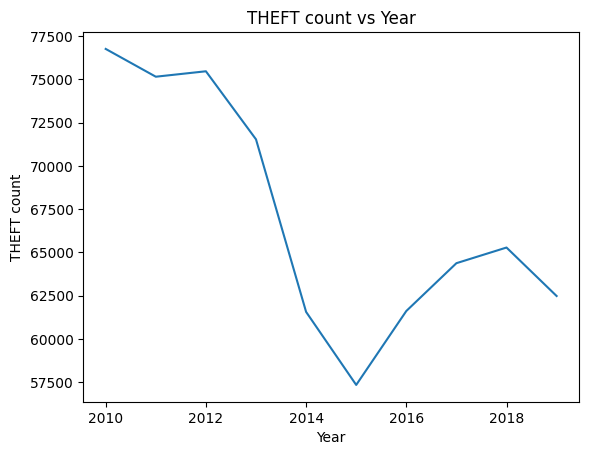

In [ ]:
def plot_by_year(year_type_df, value_name):
    by_year = year_type_df[year_type_df['Primary Type'] == value_name].groupby(['Year']).count()
    plt.plot(by_year)
    plt.title(f'{value_name} count vs Year')
    plt.xlabel('Year')
    plt.ylabel(f'{value_name} count')
    plt.show()

year_type_df = chicago_crime_df[['Year', 'Primary Type']]

# show how much theft happens over time
plot_by_year(year_type_df, 'THEFT')

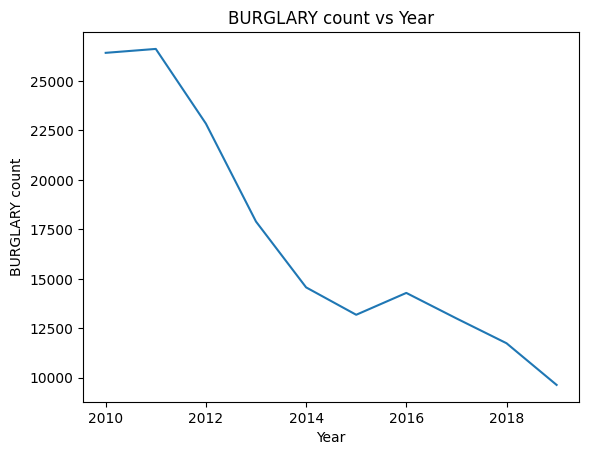

In [ ]:
plot_by_year(year_type_df, 'BURGLARY')


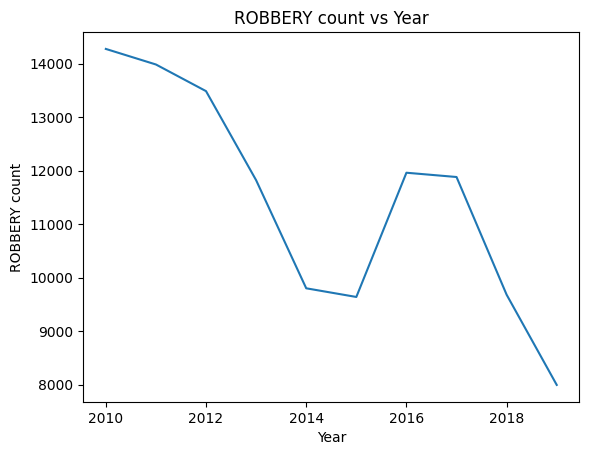

In [ ]:
plot_by_year(year_type_df, 'ROBBERY')


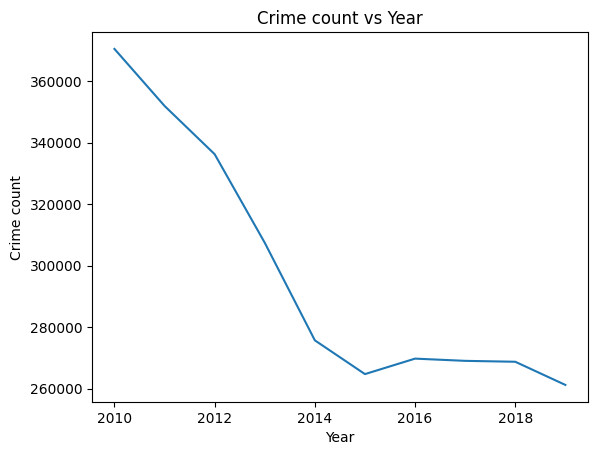

In [ ]:
count_by_year = year_type_df.groupby(['Year']).count()
plt.plot(count_by_year)
plt.title(f'Crime count vs Year')
plt.xlabel('Year')
plt.ylabel(f'Crime count')
plt.show()

In [ ]:
print("Column names in the DataFrame:")
print(chicago_crime_df.columns)

Column names in the DataFrame:
Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')


In [ ]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 3.3561910148337466


In [ ]:
print("Column names in the DataFrame:")
print(los_crime_df.columns)

Column names in the DataFrame:
Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA ', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Primary Type', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd',
       'Location Description', 'Weapon Used Cd', 'Weapon Desc', 'Status',
       'Status Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4',
       'LOCATION', 'Cross Street', 'LAT', 'LON'],
      dtype='object')


## 1.2 Gradient Boosting Algorithm (Los Angeles Dataset)

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.metrics import r2_score


# Get the copy of the dataset:
los_crime_df_copy = los_crime_df.copy(deep=True)

# Preprocess the data
# Convert "DATE OCC" column to datetime format
los_crime_df_copy['DATE OCC'] = pd.to_datetime(los_crime_df_copy['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')

# Extract year information and create new "Year" column
los_crime_df_copy['Year'] = los_crime_df_copy['DATE OCC'].dt.year

# Group by year and primary type to get count of each crime type per year
los_crime_df_copy = los_crime_df_copy.groupby(['Year', 'Primary Type']).size().reset_index(name='Count')

# Create a dataframe for LA GDP data
LA_GDP = {'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
          'GDP': [703.8, 728.1, 747.8, 775.0, 805.6, 842.3, 870.8, 908.4, 944.6, 972.1]}
LA_GDP_df = pd.DataFrame(LA_GDP)

# Merge the preprocessed LA crime dataset with the GDP dataset
merged_df = pd.merge(LA_GDP_df, los_crime_df_copy, on='Year')

# Drop any rows with missing values
merged_df = merged_df.dropna()

# Separate the target variables (crime counts) from the features
X = merged_df[["GDP"]]
y = merged_df.drop(["Year", "GDP", "Primary Type"], axis=1)

# Split the dataset into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

from sklearn.model_selection import GridSearchCV

param_grid = {
    'estimator__n_estimators': [100, 500, 1000],
    'estimator__max_depth': [3, 5, 10],
    'estimator__learning_rate': [0.01, 0.1, 1.0],
    'estimator__subsample': [0.5, 0.75, 1.0]
}

gb = MultiOutputRegressor(
    GradientBoostingRegressor(
        n_estimators=10000,
        learning_rate=0.1,
        max_depth=3,
        random_state=42,
        validation_fraction=0.2,
        n_iter_no_change=5,
        tol=0.001
    )
)
r2 = r2_score(y_test, y_pred)

grid_search = GridSearchCV(gb, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)
print("R2 Score:", -r2)


gdp_crime_df = merged_df[['GDP', 'Count']]
corr_matrix = gdp_crime_df.corr()
print(corr_matrix)



Best hyperparameters: {'estimator__learning_rate': 0.01, 'estimator__max_depth': 3, 'estimator__n_estimators': 100, 'estimator__subsample': 0.75}
Best MSE: 0.006241254204759272
R2 Score: 0.358929037119031
            GDP     Count
GDP    1.000000  0.007556
Count  0.007556  1.000000


## Conclusion of the Gradient Boosting Algorithm:

_ Chicago Dataset: The correlation matrix shows that there is a strong negative correlation (-0.978) between GDP and the burglary rate, a moderate negative correlation (-0.289) between GDP and the robbery rate, and a strong positive correlation (0.949) between GDP and the theft rate. These results suggest that as GDP increases, the burglary rate tends to decrease, while the theft rate tends to increase. The correlation between GDP and the robbery rate is not as strong, suggesting that other factors may play a larger role in determining the incidence of robbery.

_ Los Angles: The correlation matrix for LA shows that there is a very weak positive correlation (0.007) between GDP and the count of crimes. This suggests that the GDP of LA is not a strong predictor of crime rates in the city. Other factors, such as social and economic conditions, demographics, and public policy may have a larger impact on crime rates in LA.

==> The correlation between crime and GDP is larger in Chicago than in the City of City of Los Angeles.

## 1.1 K-Neighrest Neighbor (Chicago Dataset)

Correlation between GDP and Burglary Rate: -0.9784379643395908
Correlation between GDP and Robbery Rate: -0.2891897300245976
Correlation between GDP and Theft Rate: 0.9493859841331918


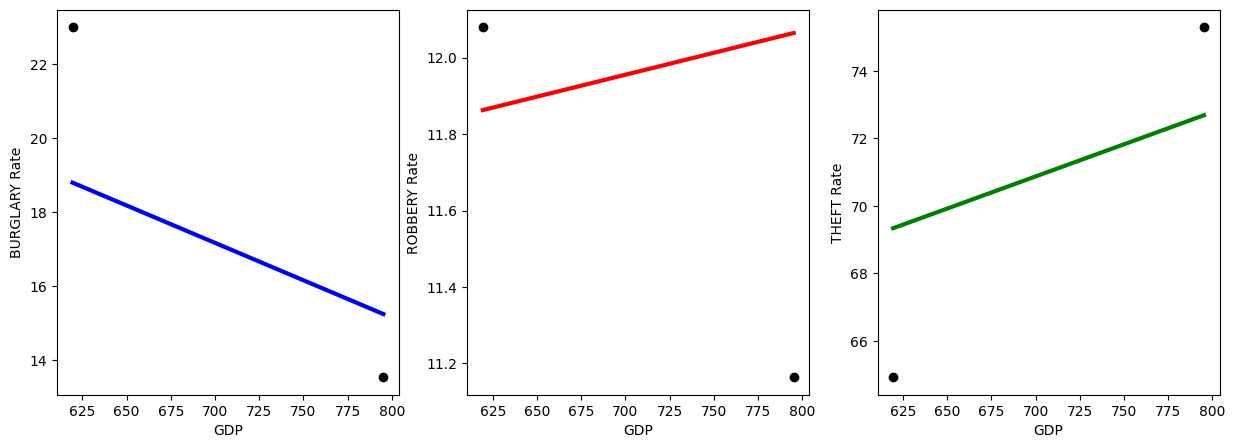

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Assuming chicago_crime_df and chicago_GDP DataFrames are already loaded

# Make a copy of the original DataFrame
chicago_crime_copy = chicago_crime_df.copy()

# Preprocess the data on the copied DataFrame
chicago_crime_copy = chicago_crime_copy.loc[chicago_crime_copy['Year'].between(2010, 2019) &
                                            chicago_crime_copy['Primary Type'].isin(['BURGLARY', 'ROBBERY', 'THEFT'])]
chicago_crime_copy = chicago_crime_copy.groupby(['Year', 'Primary Type']).size().reset_index(name='Count')
chicago_crime_copy = pd.pivot_table(chicago_crime_copy, values='Count', index=['Year'], columns=['Primary Type']).reset_index()
chicago_crime_copy.columns.name = None
# Compute crime rates as a percentage
chicago_crime_copy['Total'] = chicago_crime_copy[['BURGLARY', 'ROBBERY', 'THEFT']].sum(axis=1)
chicago_crime_copy['BURGLARY Rate'] = chicago_crime_copy['BURGLARY'] / chicago_crime_copy['Total'] * 100
chicago_crime_copy['ROBBERY Rate'] = chicago_crime_copy['ROBBERY'] / chicago_crime_copy['Total'] * 100
chicago_crime_copy['THEFT Rate'] = chicago_crime_copy['THEFT'] / chicago_crime_copy['Total'] * 100
chicago_crime_copy = chicago_crime_copy[['Year', 'BURGLARY Rate', 'ROBBERY Rate', 'THEFT Rate']]

# Merge the chicago_GDP DataFrame with the processed chicago_crime_copy DataFrame
merged_df = pd.merge(chicago_GDP, chicago_crime_copy, on='Year')
merged_df = merged_df.dropna()
merged_df.columns


# Prepare the data
X = merged_df["GDP (billions of current dollars)"].values.reshape(-1,1)
y1 = chicago_crime_copy["BURGLARY Rate"].values.reshape(-1,1)
y2 = chicago_crime_copy["ROBBERY Rate"].values.reshape(-1,1)
y3 = chicago_crime_copy["THEFT Rate"].values.reshape(-1,1)

# Split the data into training and testing sets
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=42)

# Train the model
model1 = KNeighborsRegressor().fit(X_train, y1_train)
model2 = KNeighborsRegressor().fit(X_train, y2_train)
model3 = KNeighborsRegressor().fit(X_train, y3_train)

# Make predictions
y1_pred = model1.predict(X_test)
y2_pred = model2.predict(X_test)
y3_pred = model3.predict(X_test)

# Calculate the correlation matrix
corr_matrix = merged_df[['GDP (billions of current dollars)', 'BURGLARY Rate', 'ROBBERY Rate', 'THEFT Rate']].corr()

# Print the correlation scores between GDP and the crime rates
print("Correlation between GDP and Burglary Rate:", corr_matrix.iloc[0, 1])
print("Correlation between GDP and Robbery Rate:", corr_matrix.iloc[0, 2])
print("Correlation between GDP and Theft Rate:", corr_matrix.iloc[0, 3])

# Visualize the results
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].scatter(X_test, y1_test, color='black')
axs[0].plot(X_test, y1_pred, color='blue', linewidth=3)
axs[0].set_xlabel('GDP')
axs[0].set_ylabel('BURGLARY Rate')

axs[1].scatter(X_test, y2_test, color='black')
axs[1].plot(X_test, y2_pred, color='red', linewidth=3)
axs[1].set_xlabel('GDP')
axs[1].set_ylabel('ROBBERY Rate')

axs[2].scatter(X_test, y3_test, color='black')
axs[2].plot(X_test, y3_pred, color='green', linewidth=3)
axs[2].set_xlabel('GDP')
axs[2].set_ylabel('THEFT Rate')

plt.show()

# 1.2 K-Nearest Neighbor (Los Angeles Dataset)

KNN score: -0.09693346099484423


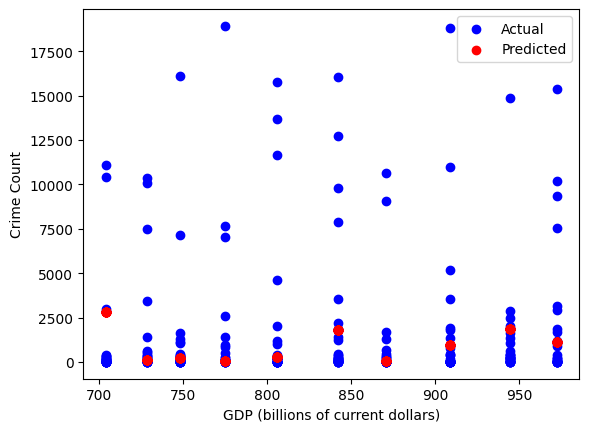

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.metrics import r2_score


# Get the copy of the dataset:
los_crime_df_copy = los_crime_df.copy(deep=True)

# Preprocess the data
# Convert "DATE OCC" column to datetime format
los_crime_df_copy['DATE OCC'] = pd.to_datetime(los_crime_df_copy['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')

# Extract year information and create new "Year" column
los_crime_df_copy['Year'] = los_crime_df_copy['DATE OCC'].dt.year

# Group by year and primary type to get count of each crime type per year
los_crime_df_copy = los_crime_df_copy.groupby(['Year', 'Primary Type']).size().reset_index(name='Count')

# Create a dataframe for LA GDP data
LA_GDP = {'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
          'GDP': [703.8, 728.1, 747.8, 775.0, 805.6, 842.3, 870.8, 908.4, 944.6, 972.1]}
LA_GDP_df = pd.DataFrame(LA_GDP)

# Merge the preprocessed LA crime dataset with the GDP dataset
merged_df = pd.merge(LA_GDP_df, los_crime_df_copy, on='Year')

# Drop any rows with missing values
merged_df = merged_df.dropna()


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(merged_df[['GDP']], merged_df[['Count']], test_size=0.2, random_state=42)

# Train the KNN model
knn_model = KNeighborsRegressor().fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
score = knn_model.score(X_test, y_test)
print("KNN score:", score)

# Scatter plot of GDP and Crime Count
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('GDP (billions of current dollars)')
plt.ylabel('Crime Count')
plt.legend()
plt.show()


## 2.1 K-Mean Clustering (Chicago Dataset)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The average silhouette_score is : 0.5807912866940642


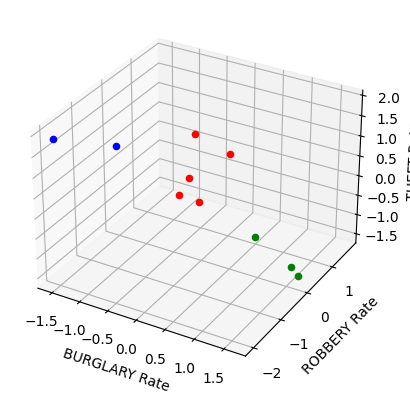

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



# Assuming chicago_crime_df and chicago_GDP DataFrames are already loaded

# Make a copy of the original DataFrame
chicago_crime_copy = chicago_crime_df.copy()

# Preprocess the data on the copied DataFrame
chicago_crime_copy = chicago_crime_copy.loc[chicago_crime_copy['Year'].between(2010, 2019) &
                                            chicago_crime_copy['Primary Type'].isin(['BURGLARY', 'ROBBERY', 'THEFT'])]
chicago_crime_copy = chicago_crime_copy.groupby(['Year', 'Primary Type']).size().reset_index(name='Count')
chicago_crime_copy = pd.pivot_table(chicago_crime_copy, values='Count', index=['Year'], columns=['Primary Type']).reset_index()
chicago_crime_copy.columns.name = None
# Compute crime rates as a percentage
chicago_crime_copy['Total'] = chicago_crime_copy[['BURGLARY', 'ROBBERY', 'THEFT']].sum(axis=1)
chicago_crime_copy['BURGLARY Rate'] = chicago_crime_copy['BURGLARY'] / chicago_crime_copy['Total'] * 100
chicago_crime_copy['ROBBERY Rate'] = chicago_crime_copy['ROBBERY'] / chicago_crime_copy['Total'] * 100
chicago_crime_copy['THEFT Rate'] = chicago_crime_copy['THEFT'] / chicago_crime_copy['Total'] * 100
chicago_crime_copy = chicago_crime_copy[['Year', 'BURGLARY Rate', 'ROBBERY Rate', 'THEFT Rate']]

# # Merge the chicago_GDP DataFrame with the processed chicago_crime_copy DataFrame
# merged_df = pd.merge(chicago_GDP, chicago_crime_copy, on='Year')
# merged_df = merged_df.dropna()
# Preprocess the data
# chicago_crime_copy = chicago_crime_df[['Year', 'BURGLARY Rate', 'ROBBERY Rate', 'THEFT Rate']].copy()
scaler = StandardScaler()
scaled_df = scaler.fit_transform(chicago_crime_copy.iloc[:, 1:])

# Apply KMeans clustering
kmeans_model = KMeans(n_clusters=3, random_state=42).fit(scaled_df)
labels = kmeans_model.labels_

# Evaluate the model using the silhouette score
silhouette_avg = silhouette_score(chicago_crime_copy, labels)
print("The average silhouette_score is :", silhouette_avg)

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data with three colors based on cluster labels
colors = ['r', 'g', 'b']
for i in range(len(scaled_df)):
    ax.scatter(scaled_df[i, 0], scaled_df[i, 1], scaled_df[i, 2], c=colors[labels[i]], marker='o')

# Set the labels for each axis
ax.set_xlabel('BURGLARY Rate')
ax.set_ylabel('ROBBERY Rate')
ax.set_zlabel('THEFT Rate')

# Show the plot
plt.show()

## 2.2 K-Means (Los Angles Dataset)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The average silhouette_score is : 0.6985380926652113


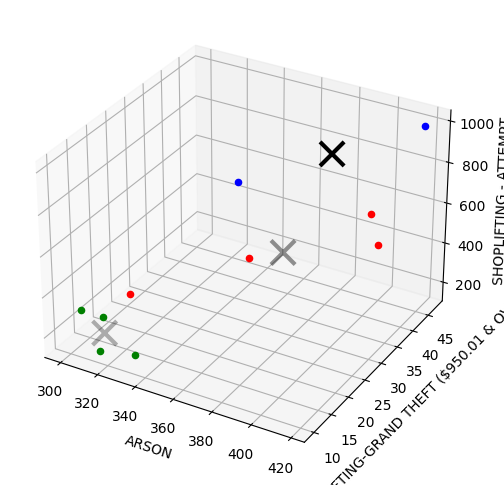

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the LA crime dataset

# Get the copy of the dataset:
los_crime_df_copy = los_crime_df.copy(deep=True)

# Preprocess the data
# Convert "DATE OCC" column to datetime format
los_crime_df_copy['DATE OCC'] = pd.to_datetime(los_crime_df_copy['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')

# Extract year information and create new "Year" column
los_crime_df_copy['Year'] = los_crime_df_copy['DATE OCC'].dt.year

# Group by year and primary type to get count of each crime type per year
los_crime_df_copy = los_crime_df_copy.groupby(['Year', 'Primary Type']).size().reset_index(name='Count')

# Create a dataframe for LA GDP data
LA_GDP = {'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
          'GDP': [703.8, 728.1, 747.8, 775.0, 805.6, 842.3, 870.8, 908.4, 944.6, 972.1]}
LA_GDP_df = pd.DataFrame(LA_GDP)

# Merge the preprocessed LA crime dataset with the GDP dataset
la_crime_df = pd.merge(LA_GDP_df, los_crime_df_copy, on='Year')

# Get the top 3 most popular primary types
top3_types = la_crime_df['Primary Type'].value_counts().nlargest(3).index.tolist()

# Filter the dataset to only include the top 3 primary types
la_crime_top3 = la_crime_df.loc[la_crime_df['Primary Type'].isin(top3_types)]

# Pivot the data to get the count of each primary type per year
la_crime_top3_pivot = la_crime_top3.pivot_table(values='Count', index='Year', columns='Primary Type', aggfunc='sum')

# Fill any missing values with 0
la_crime_top3_pivot.fillna(0, inplace=True)

# Train a KMeans model on the data
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(la_crime_top3_pivot)

# Get the labels and centroids of the trained model
labels = kmeans_model.labels_
centroids = kmeans_model.cluster_centers_

# Evaluate the model using the silhouette score
silhouette_avg = silhouette_score(la_crime_top3_pivot, labels)
print("The average silhouette_score is :", silhouette_avg)

# Plot the results
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b']
for i in range(len(la_crime_top3_pivot)):
    ax.scatter(la_crime_top3_pivot.iloc[i, 0], la_crime_top3_pivot.iloc[i, 1], la_crime_top3_pivot.iloc[i, 2], color=colors[labels[i]])

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', s=300, linewidths=3, color='k')

ax.set_xlabel(top3_types[0])
ax.set_ylabel(top3_types[1])
ax.set_zlabel(top3_types[2])

plt.show()


## 3.1 Mean-shift Clustering (Chicago Dataset)


The average silhouette_score is : 0.32235772470456014


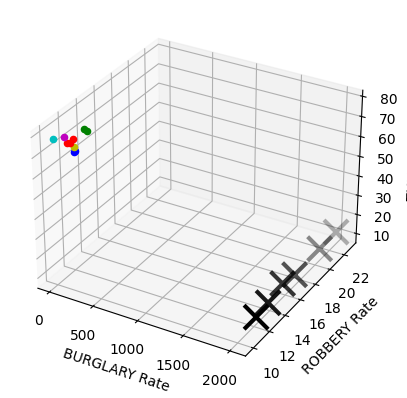

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming chicago_crime_df and chicago_GDP DataFrames are already loaded

# Make a copy of the original DataFrame
chicago_crime_copy = chicago_crime_df.copy()

# Preprocess the data on the copied DataFrame
chicago_crime_copy = chicago_crime_copy.loc[chicago_crime_copy['Year'].between(2010, 2019) &
                                            chicago_crime_copy['Primary Type'].isin(['BURGLARY', 'ROBBERY', 'THEFT'])]
chicago_crime_copy = chicago_crime_copy.groupby(['Year', 'Primary Type']).size().reset_index(name='Count')
chicago_crime_copy = pd.pivot_table(chicago_crime_copy, values='Count', index=['Year'], columns=['Primary Type']).reset_index()
chicago_crime_copy.columns.name = None
# Compute crime rates as a percentage
chicago_crime_copy['Total'] = chicago_crime_copy[['BURGLARY', 'ROBBERY', 'THEFT']].sum(axis=1)
chicago_crime_copy['BURGLARY Rate'] = chicago_crime_copy['BURGLARY'] / chicago_crime_copy['Total'] * 100
chicago_crime_copy['ROBBERY Rate'] = chicago_crime_copy['ROBBERY'] / chicago_crime_copy['Total'] * 100
chicago_crime_copy['THEFT Rate'] = chicago_crime_copy['THEFT'] / chicago_crime_copy['Total'] * 100
chicago_crime_copy = chicago_crime_copy[['Year', 'BURGLARY Rate', 'ROBBERY Rate', 'THEFT Rate']]

# Estimate the bandwidth
bandwidth = estimate_bandwidth(chicago_crime_copy, quantile=0.2, n_samples=len(chicago_crime_copy))

# Train the model
ms_model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_model.fit(chicago_crime_copy)

# Get the labels and cluster centers
labels = ms_model.labels_
cluster_centers = ms_model.cluster_centers_

from sklearn.metrics import silhouette_score

# Compute the silhouette score for the clusters
silhouette_avg = silhouette_score(chicago_crime_copy, labels)
print("The average silhouette_score is :", silhouette_avg)

# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

for i in range(len(chicago_crime_copy)):
    ax.scatter(chicago_crime_copy.values[i, 1], chicago_crime_copy.values[i, 2], chicago_crime_copy.values[i, 3], color=colors[labels[i]])

ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], marker='x', s=300, linewidths=3, color='k')

ax.set_xlabel('BURGLARY Rate')
ax.set_ylabel('ROBBERY Rate')
ax.set_zlabel('THEFT Rate')

plt.show()


## 3.2 Mean-shift Clustering (Los Angeles Dataset)

The average silhouette_score is : 0.5669607311276977


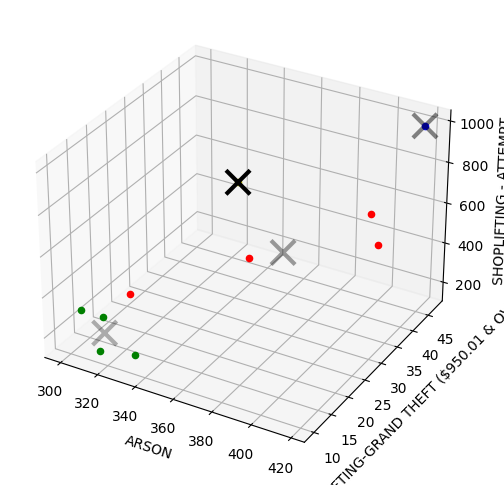

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift
from mpl_toolkits.mplot3d import Axes3D

# Get the copy of the dataset:
los_crime_df_copy = los_crime_df.copy(deep=True)

# Preprocess the data
# Convert "DATE OCC" column to datetime format
los_crime_df_copy['DATE OCC'] = pd.to_datetime(los_crime_df_copy['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')

# Extract year information and create new "Year" column
los_crime_df_copy['Year'] = los_crime_df_copy['DATE OCC'].dt.year

# Group by year and primary type to get count of each crime type per year
los_crime_df_copy = los_crime_df_copy.groupby(['Year', 'Primary Type']).size().reset_index(name='Count')

# Create a dataframe for LA GDP data
LA_GDP = {'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
          'GDP': [703.8, 728.1, 747.8, 775.0, 805.6, 842.3, 870.8, 908.4, 944.6, 972.1]}
LA_GDP_df = pd.DataFrame(LA_GDP)

# Merge the preprocessed LA crime dataset with the GDP dataset
la_crime_df = pd.merge(LA_GDP_df, los_crime_df_copy, on='Year')

# Get the top 3 most popular primary types
top3_types = la_crime_df['Primary Type'].value_counts().nlargest(3).index.tolist()

# Filter the dataset to only include the top 3 primary types
la_crime_top3 = la_crime_df.loc[la_crime_df['Primary Type'].isin(top3_types)]

# Pivot the data to get the count of each primary type per year
la_crime_top3_pivot = la_crime_top3.pivot_table(values='Count', index='Year', columns='Primary Type', aggfunc='sum')

# Fill any missing values with 0
la_crime_top3_pivot.fillna(0, inplace=True)

# Train a Mean-Shift model on the data
ms_model = MeanShift()
ms_model.fit(la_crime_top3_pivot)

# Get the labels and cluster centers of the trained model
labels = ms_model.labels_
cluster_centers = ms_model.cluster_centers_

from sklearn.metrics import silhouette_score

# Compute the silhouette score for the clusters
silhouette_avg = silhouette_score(la_crime_top3_pivot, labels)
print("The average silhouette_score is :", silhouette_avg)

# Plot the results
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'y', 'm', 'c', 'k']
for i in range(len(la_crime_top3_pivot)):
    ax.scatter(la_crime_top3_pivot.iloc[i, 0], la_crime_top3_pivot.iloc[i, 1], la_crime_top3_pivot.iloc[i, 2], color=colors[labels[i]])

ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], marker='x', s=300, linewidths=3, color='k')

ax.set_xlabel(top3_types[0])
ax.set_ylabel(top3_types[1])
ax.set_zlabel(top3_types[2])

plt.show()